In [44]:
import os 
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib
%run ../utils_show.py
path = "../../data/saved_obs_sent/"


list_QA = ["eval_global","performance", "compatibility", "usability", "reliability", "security", "maintainability", "portability"]



In [45]:
list_dic_obs = []
for i in range(100,610,100):
    dic_obs = {}
    file="train_"+str(i)+"/eval_train_"+str(i)+".csv"
    df = pd.read_csv(path + file)
    observations = [ast.literal_eval(lab) for lab in list(df["eval"])] 
    for qa in list_QA:
        try :
            dic_obs[qa] = [obs[qa]["eval"] for obs in observations ]
        except KeyError:
            dic_obs[qa] = [obs[qa] for obs in observations ]
            
    list_dic_obs.append(dic_obs)




In [46]:
dic_all_qa = {}
for qa in list_QA:
    f1_score_max = []
    recall_max = []
    precision_max = []


    for i in range(0,len(list_dic_obs)):
        f1_score_max_act = 0
        recall = 0
        precision = 0
        for j in range(0,len(list_dic_obs[i][qa])):
            new_f1 = list_dic_obs[i][qa][j]["textcat_f"]
            if(f1_score_max_act < new_f1):
                f1_score_max_act = new_f1
                recall = list_dic_obs[i][qa][j]["textcat_r"]
                precision = list_dic_obs[i][qa][j]["textcat_p"]
                
            

        """
        f1_score_max.append(max([val["textcat_f"] for val in list_dic_obs[i][qa]]))
        recall_max.append(max([val["textcat_r"] for val in list_dic_obs[i][qa]]))
        precision_max.append(max([val["textcat_p"] for val in list_dic_obs[i][qa]]))
        
        f1_score_max.append(list_dic_obs[i][qa][99]["textcat_f"])
        recall_max.append(list_dic_obs[i][qa][99]["textcat_r"])
        precision_max.append(list_dic_obs[i][qa][99]["textcat_p"])
        """
        f1_score_max.append(f1_score_max_act)
        recall_max.append(recall)
        precision_max.append(precision)
        
        
    dic_all_qa[qa]={
        "precision":precision_max,
        "recall":recall_max,
        "f1_score":f1_score_max
    }

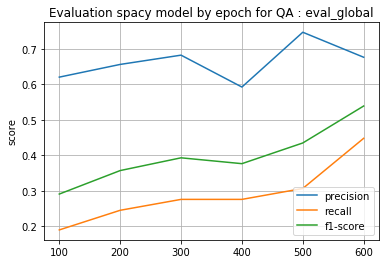

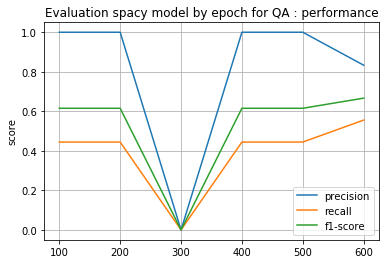

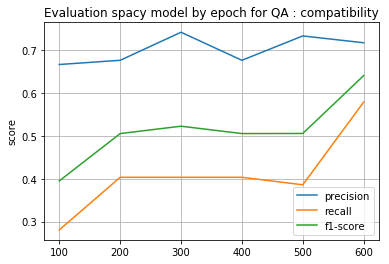

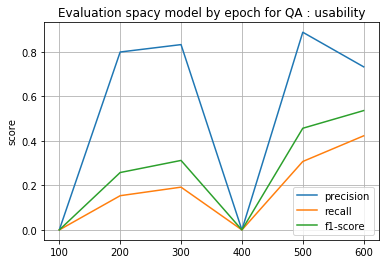

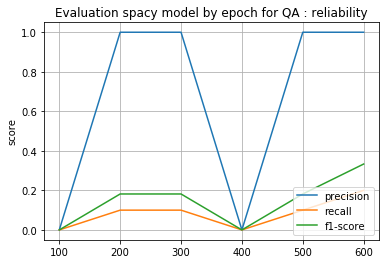

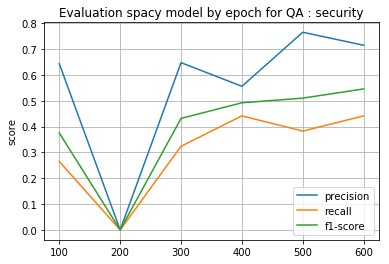

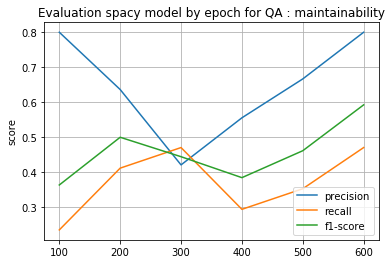

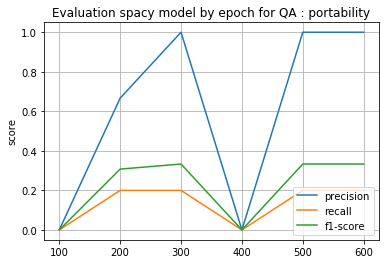

In [47]:
for qa in list_QA:
    x = [val for val in range(100,610,100)]
    fig, ax = plt.subplots()
    ax.plot(x, dic_all_qa[qa]["precision"],label="precision")
    ax.plot(x, dic_all_qa[qa]["recall"],label="recall")
    ax.plot(x, dic_all_qa[qa]["f1_score"],label="f1-score")

    plt.legend(loc=4,borderaxespad=0.5)

    ax.set(xlabel="", ylabel='score',
           title='Evaluation spacy model by epoch for QA : '+qa)
    ax.grid()
    plt.savefig("./svg/test_4/"+qa+".svg", format="svg")
    plt.show()

In [33]:
list_dic_obs[2]

8

In [34]:
dic_all_qa

{'eval_global': {'precision': [0.5833333332118056,
   0.5937499999072265,
   0.646341463335812,
   0.5857142856306122,
   0.6455696201714468,
   0.6796116504194551],
  'recall': [0.17177914109375586,
   0.23312883434152581,
   0.32515337421318075,
   0.2515337423158568,
   0.31288343556362674,
   0.4294478527343897],
  'f1_score': [0.26540284357673904,
   0.3348017620850395,
   0.43265306118917113,
   0.3519313304418943,
   0.4214876032709514,
   0.5263157894341115]},
 'performance': {'precision': [0.6666666655555555,
   0.9999999975,
   0.7999999984,
   0.6666666655555555,
   0.6666666655555555,
   0.7999999984],
  'recall': [0.4444444439506172,
   0.4444444439506172,
   0.4444444439506172,
   0.4444444439506172,
   0.4444444439506172,
   0.4444444439506172],
  'f1_score': [0.5333333326222222,
   0.6153846144378697,
   0.571428570612245,
   0.5333333326222222,
   0.5333333326222222,
   0.571428570612245]},
 'compatibility': {'precision': [0.6086956519092628,
   0.6111111109413581,
   

In [36]:
len(list_dic_obs[i][qa])

100